# Finite Element Analysis [ME335A]

### Install Dependencies

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib

### Problem 1 - (c)

In [ ]:
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 18,          # Base font size for text
    'axes.titlesize': 20,     # Font size for axes titles
    'axes.labelsize': 20,     # Font size for x and y labels
    'xtick.labelsize': 16,    # Font size for x tick labels
    'ytick.labelsize': 16,    # Font size for y tick labels
    'legend.fontsize': 16,    # Font size for legend
    'figure.titlesize': 22    # Font size for figure title
})

In [ ]:
def iPn(x, n):
    result = 0
    sqrt_2n_plus_1 = math.sqrt(2 * n + 1)
    sign = (-1) ** (n + 1)

    for k in range(n + 1):
        binomial_n_k = math.comb(n, k)
        binomial_n_plus_k_k = math.comb(n + k, k)
        term = binomial_n_k * binomial_n_plus_k_k * (-x)**(k + 1) / (k + 1)
        result += term

    return sqrt_2n_plus_1 * sign * result

In [ ]:
def integrand(x, k):
    return math.cos(4 * math.pi * x) * iPn(x, k)

In [ ]:
def integrate_cos_iPk(k):
    result, _ = integrate.quad(lambda x: integrand(x, k), 0, 1)
    return result

In [ ]:
def u(x, order):
  result = 0

  for n in range(order+1):
    result = result + iPn(x, n) * integrate_cos_iPk(n)

  return result

In [ ]:
def u_true(x):
  return -(np.sin(2*np.pi*x))**2/(8*np.pi**2)

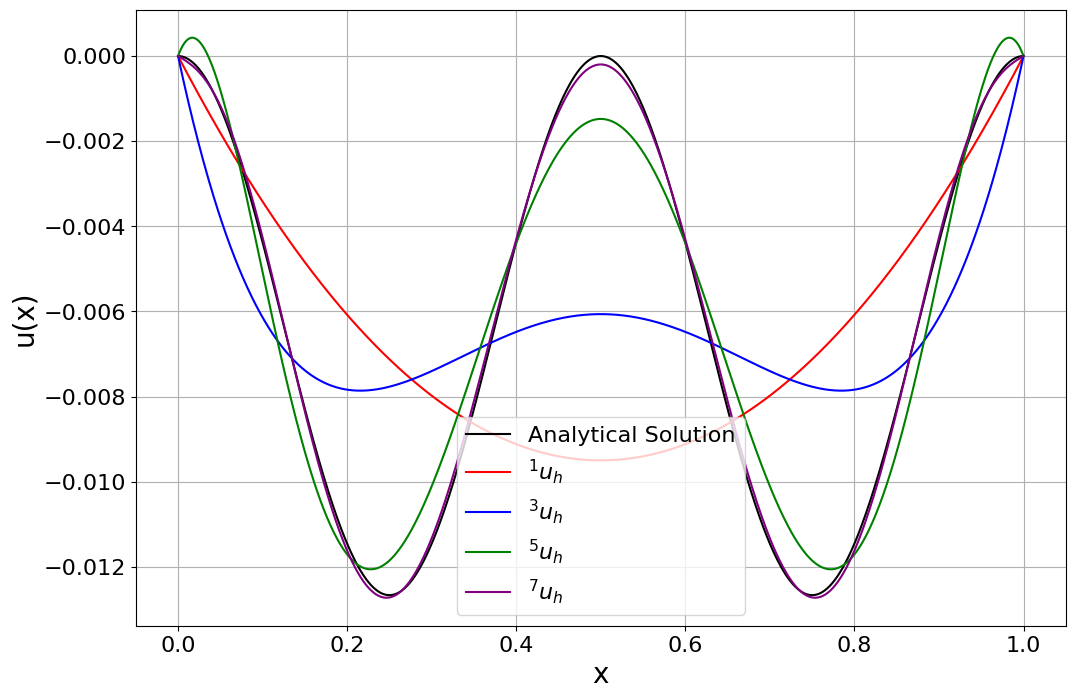

In [ ]:
orders = [1, 3, 5, 7]
colors = ['red', 'blue', 'green', 'purple']
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 8))
plt.plot(x, u_true(x), label='Analytical Solution', color='black')

for order, color in zip(orders, colors):
    y = [u(xi, order) for xi in x]
    plt.plot(x, y, label=rf'$^{{{order}}}u_h$', color=color)

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

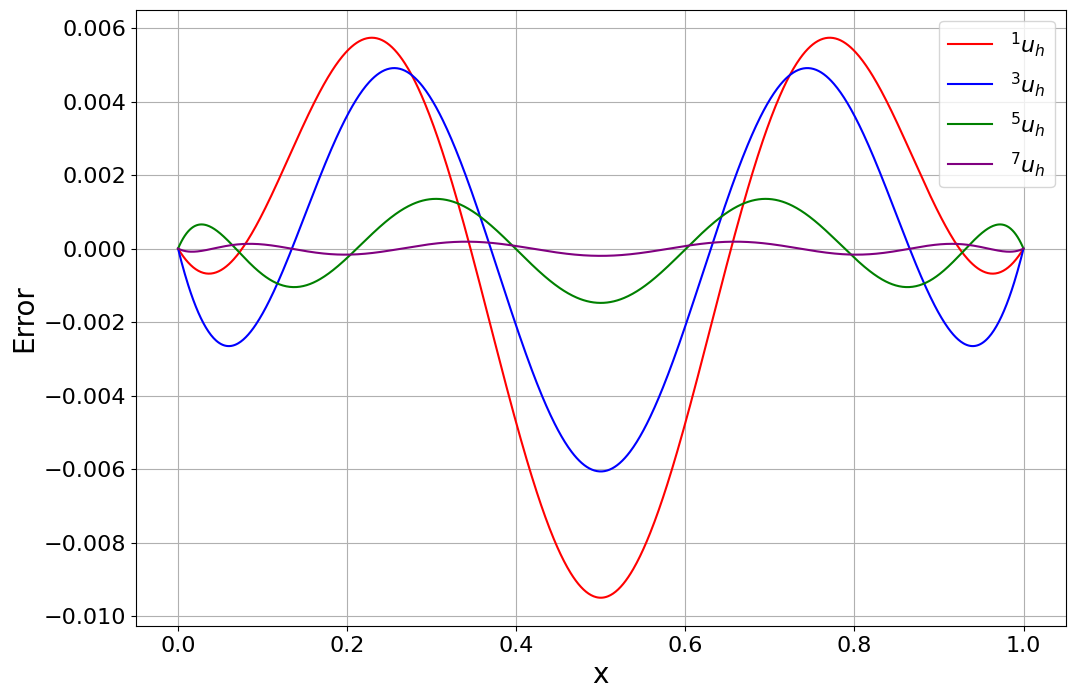

In [ ]:
orders = [1, 3, 5, 7]
colors = ['red', 'blue', 'green', 'purple']
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 8))
for order, color in zip(orders, colors):
    y = [u(xi, order) for xi in x]
    plt.plot(x, y - u_true(x), label=rf'$^{{{order}}}u_h$', color=color)
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
orders = [1, 3, 5, 7]
coeffs = []

for i in orders:
  coeff = []
  for m in range(i+1):
    coeff.append(integrate_cos_iPk(m))
  coeffs.append(coeff)

for coeff in coeffs:
  print(coeff)

[6.938893903907228e-18, 0.021936679743943192]
[6.938893903907228e-18, 0.021936679743943192, 5.898218566937698e-17, 0.020777002427996148]
[6.938893903907228e-18, 0.021936679743943192, 5.898218566937698e-17, 0.020777002427996148, 5.513866454994695e-16, -0.044246392153189505]
[6.938893903907228e-18, 0.021936679743943192, 5.898218566937698e-17, 0.020777002427996148, 5.513866454994695e-16, -0.044246392153189505, -1.666591933233781e-14, 0.0169227783379611]


### Problem 1 - (d)

In [ ]:
def u_new(x, order):
  result = 0

  for n in range(2, order+1):
    result = result + iPn(x, n) * integrate_cos_iPk(n)

  return result

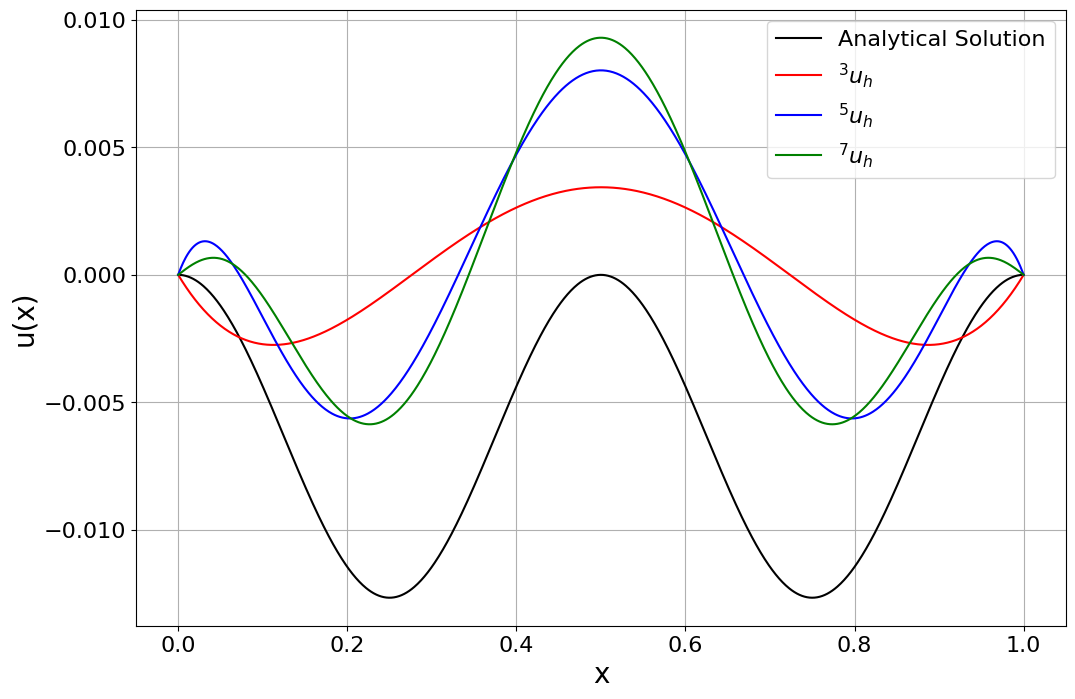

In [ ]:
orders = [3, 5, 7]
colors = ['red', 'blue', 'green', 'purple']
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 8))
plt.plot(x, u_true(x), label='Analytical Solution', color='black')

for order, color in zip(orders, colors):
    y = [u_new(xi, order) for xi in x]
    plt.plot(x, y, label=rf'$^{{{order}}}u_h$', color=color)

plt.rcParams.update({'font.size': 18})
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

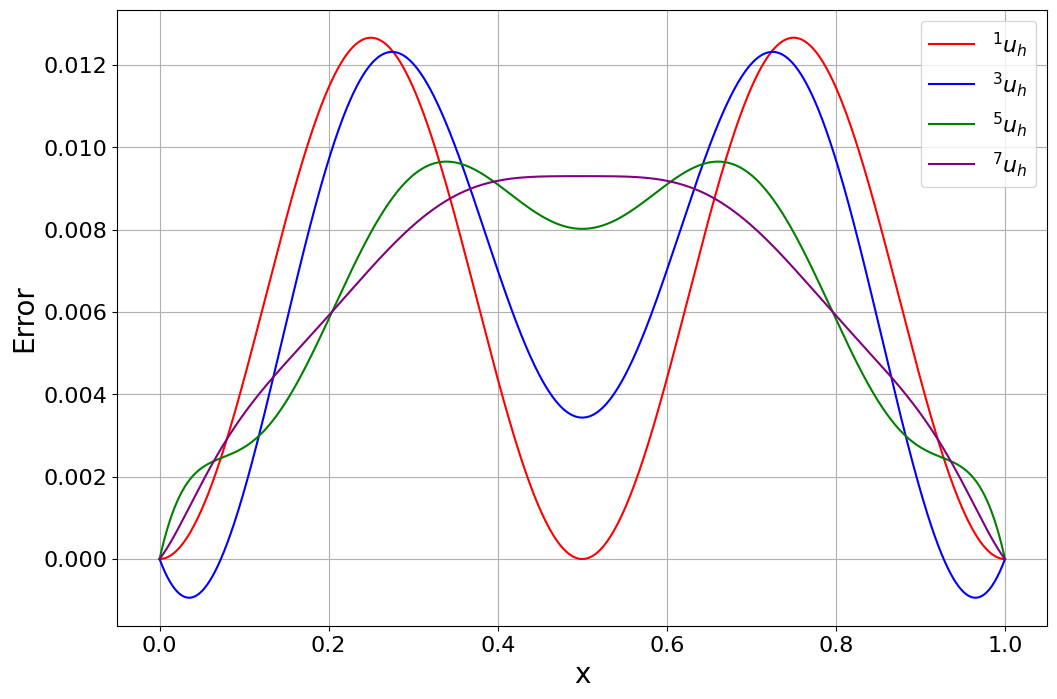

In [ ]:
orders = [1, 3, 5, 7]
colors = ['red', 'blue', 'green', 'purple']
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 8))
for order, color in zip(orders, colors):
    y = [u_new(xi, order) for xi in x]
    plt.plot(x, y - u_true(x), label=rf'$^{{{order}}}u_h$', color=color)
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
orders = [3, 5, 7]
coeffs = []

for i in orders:
  coeff = []
  for m in range(2, i+1):
    coeff.append(integrate_cos_iPk(m))
  coeffs.append(coeff)

for coeff in coeffs:
  print(coeff)

[5.898218566937698e-17, 0.020777002427996148]
[5.898218566937698e-17, 0.020777002427996148, 5.513866454994695e-16, -0.044246392153189505]
[5.898218566937698e-17, 0.020777002427996148, 5.513866454994695e-16, -0.044246392153189505, -1.666591933233781e-14, 0.0169227783379611]


### Problem 2

In [2]:
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
# Shape function
def shape_func(x=0.0, n=1, n_mesh=4):
  h = 1 / n_mesh
  center = (n - 1) * h

  if (center - h <= x < center): return (x - center + h) / h
  elif (center <= x < center + h): return (- x + center + h) / h
  else: return 0

In [4]:
# Derivative of the shape function
def shape_func_der(x, n, n_mesh):
    h = 1 / n_mesh
    center = (n - 1) * h

    if (center - h <= x < center): return 1 / h
    elif (center <= x < center + h): return -1 / h
    else: return 0

In [5]:
# Bilinear function
def a_func(u, w, n1, n2, n_mesh, lambda_val):
    def integrand(x):
        w_x = shape_func_der(x, n2, n_mesh)
        u_x = shape_func_der(x, n1, n_mesh)
        return w_x * u_x + lambda_val * w(x, n2, n_mesh) * u(x, n1, n_mesh)

    integral, _ = integrate.quad(integrand, 0, 1)
    return integral + w(1, n2, n_mesh) * u(1, n1, n_mesh)

In [6]:
# Linear function
def l_func(w, n, n_mesh):
    def integrand(x):
        return w(x, n, n_mesh) * x**2

    integral, _ = integrate.quad(integrand, 0, 1)
    return integral + w(1, n, n_mesh)

In [7]:
# Compute stiffness matrix
n_mesh = 4
lambda_val = 2.0
K, F = np.zeros((n_mesh+1, n_mesh+1)), np.zeros((n_mesh+1))

# Active
for i in range(1, n_mesh+2):
  for j in range(2, n_mesh+2):
    u, w = shape_func, shape_func
    K[j-1, i-1] = a_func(u, w, i, j, n_mesh, lambda_val)

# Constrained
K[0, 0] = 1.0

print(K)

[[ 1.          0.          0.          0.          0.        ]
 [-3.91666667  8.33333333 -3.91666667  0.          0.        ]
 [ 0.         -3.91666667  8.33333333 -3.91666667  0.        ]
 [ 0.          0.         -3.91666667  8.33333333 -3.91666667]
 [ 0.          0.          0.         -3.91666667  5.16666667]]


In [8]:
# Compute load vector
# Active
for i in range(1, 6):
  w = shape_func
  F[i-1] = l_func(w, i, n_mesh)

# Constrained
F[0] = 0.0

print(F)

[0.         0.01822917 0.06510417 0.14322917 1.10546875]


In [9]:
# Compute coefficients
ubars = np.linalg.inv(K) @ F

print(ubars)

[-4.29104152e-16  1.04411610e-01  2.17498105e-01  3.41727977e-01
  4.73013547e-01]


In [10]:
# Construct a finite element solution
def u_sol(x, ubars):
  result = 0.0

  for i in range(1, 6):
    result = result + ubars[i-1] * shape_func(x, i, n_mesh=4)

  return result

In [11]:
# Analytical solution
def u_exact(x):
  return -0.5 * math.cosh(math.sqrt(2) * x) + 0.2906 * math.sinh(math.sqrt(2) * x) + 0.5 * x ** 2 + 0.5

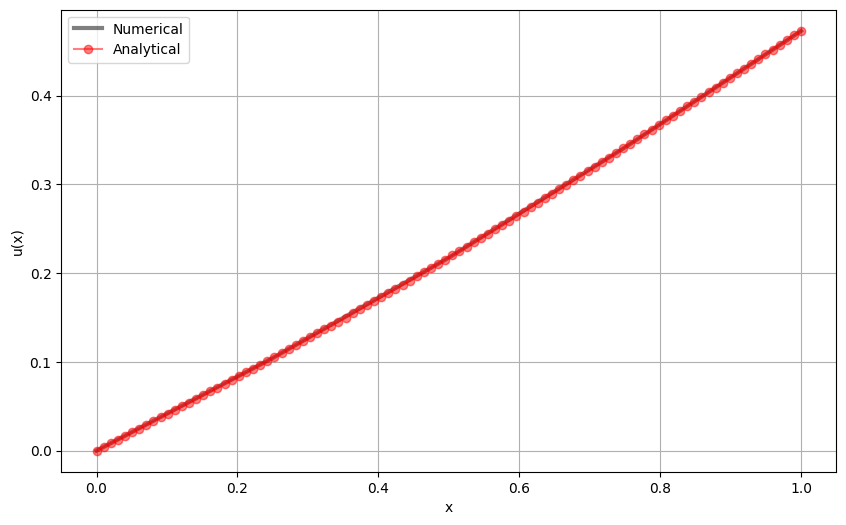

In [14]:
x = np.linspace(0, 1, 100)
y = [u_sol(xi, ubars) for xi in x]
ys = [u_exact(xi) for xi in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', label='Numerical', linewidth=3, alpha=0.5)
plt.plot(x, ys, 'ro-', label='Analytical', alpha=0.5)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

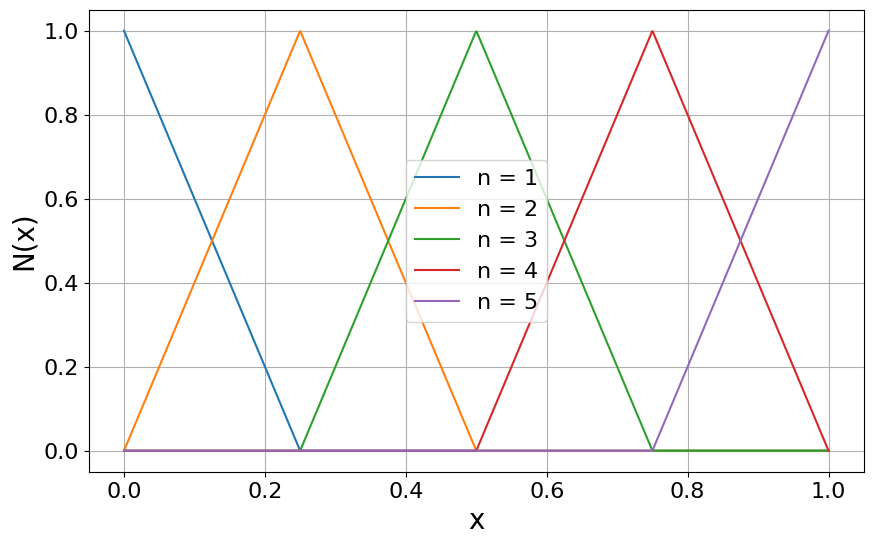

In [ ]:
n_mesh = 4
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(10, 6))

for n in range(1, 6):
    y = [shape_func(xi, n, n_mesh) for xi in x]
    plt.plot(x, y, label=f'n = {n}')

plt.xlabel('x')
plt.ylabel('N(x)')
plt.legend()
plt.grid(True)
plt.show()